In [24]:
import pandas as pd
import numpy as np
import streamlit as st

df = pd.read_csv("D:\Documents\pairs_crypto.csv", index_col=0, parse_dates=True,skiprows=6)
# drop unnamed columns
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
# drop columns with no data
df.dropna(axis=1, how='all', inplace=True)
df=df.dropna()
df.head()

# Test with inverse volatility based returns
# test for other pairs

,ticker1,closePEP,ret1PEP,PEP_ret5,PEP_ret10,PEP_ret20,zPEP5,zPEP10,zPEP20,ticker2,...,Scap20?,Age20,Aged20?,pos20,fret1_z20,Z5EQ,Z10EQ,Z20EQ,ComboRet,ComboEQ
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-04 09:00:00,BTC,7347.07,0.0010,0.0029,0.0019,0.0015,0.1896,0.0815,0.0523,ETH,...,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0
2020-01-04 10:00:00,BTC,7300.00,-0.0064,-0.0041,-0.0003,0.0073,-0.2704,-0.0113,0.2525,ETH,...,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0
2020-01-04 11:00:00,BTC,7323.04,0.0032,-0.0032,0.0025,0.0016,-0.2068,0.1067,0.0569,ETH,...,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0
2020-01-04 12:00:00,BTC,7300.04,-0.0031,-0.0057,-0.0028,-0.0122,-0.3724,-0.1196,-0.4214,ETH,...,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0
2020-01-04 13:00:00,BTC,7289.15,-0.0015,-0.0069,-0.0054,-0.0085,-0.4493,-0.2310,-0.2936,ETH,...,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0


In [25]:
df.columns

Index(['ticker1', 'closePEP', 'ret1PEP', 'PEP_ret5', 'PEP_ret10', 'PEP_ret20',
       'zPEP5', 'zPEP10', 'zPEP20', 'ticker2', 'closeKO', 'ret1KO', 'KO_ret5',
       'KO_ret10', 'KO_ret20', 'zKO5', 'zKO10', 'zKO20', 'zdiff5', 'zdiff10',
       'zdiff20', 'vol20PEP', 'vol20KO', 'WtPEP', 'wtKO', 'sumwts', 'wpep',
       'wko', 'FRet1', 'Signal5', 'Lcap5?', 'Scap5?', 'Age5', 'Aged5?', 'pos5',
       'fret1_z5', 'Signal10', 'Lcap10?', 'Scap10?', 'Age10', 'Aged10?',
       'pos10', 'fret1_z10', 'Signal20', 'Lcap20?', 'Scap20?', 'Age20',
       'Aged20?', 'pos20', 'fret1_z20', 'Z5EQ', 'Z10EQ', 'Z20EQ', 'ComboRet',
       'ComboEQ'],
      dtype='object')

In [26]:
# Calculate the spread
df["spread"] = df["ret1PEP"] - df["ret1KO"]


In [27]:
#check if spread is positive or negative and assign 1 or 0
df["spread_signal"] = np.where(df["spread"] > 0, 1, 0)
# Shift the signal back by one day
df["spread_signal"] = df["spread_signal"].shift(-1)
df["spread_signal"] = df["spread_signal"].fillna(0)


In [28]:
df.head(10)

,ticker1,closePEP,ret1PEP,PEP_ret5,PEP_ret10,PEP_ret20,zPEP5,zPEP10,zPEP20,ticker2,...,Aged20?,pos20,fret1_z20,Z5EQ,Z10EQ,Z20EQ,ComboRet,ComboEQ,spread,spread_signal
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-04 09:00:00,BTC,7347.07,0.0010,0.0029,0.0019,0.0015,0.1896,0.0815,0.0523,ETH,...,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,-0.0031,0.0
2020-01-04 10:00:00,BTC,7300.00,-0.0064,-0.0041,-0.0003,0.0073,-0.2704,-0.0113,0.2525,ETH,...,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,-0.0019,1.0
2020-01-04 11:00:00,BTC,7323.04,0.0032,-0.0032,0.0025,0.0016,-0.2068,0.1067,0.0569,ETH,...,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,0.0010,1.0
2020-01-04 12:00:00,BTC,7300.04,-0.0031,-0.0057,-0.0028,-0.0122,-0.3724,-0.1196,-0.4214,ETH,...,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,0.0040,0.0
2020-01-04 13:00:00,BTC,7289.15,-0.0015,-0.0069,-0.0054,-0.0085,-0.4493,-0.2310,-0.2936,ETH,...,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,-0.0037,1.0
2020-01-04 14:00:00,BTC,7303.70,0.0020,-0.0059,-0.0030,-0.0051,-0.3861,-0.1283,-0.1749,ETH,...,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,0.0009,0.0
2020-01-04 15:00:00,BTC,7304.97,0.0002,0.0007,-0.0035,-0.0031,0.0447,-0.1475,-0.1066,ETH,...,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,-0.0014,1.0
2020-01-04 16:00:00,BTC,7294.33,-0.0015,-0.0039,-0.0071,-0.0025,-0.2585,-0.3030,-0.0853,ETH,...,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,0.0002,0.0
2020-01-04 17:00:00,BTC,7337.95,0.0060,0.0052,-0.0005,0.0097,0.3432,-0.0225,0.3375,ETH,...,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,-0.0047,1.0


In [29]:
# Select X variables for decision tree
X = df[['closePEP','ret1PEP','zPEP5', 'zPEP10', 'zPEP20','closeKO', 'ret1KO','zKO5', 'zKO10', 'zKO20', 'zdiff5', 'zdiff10',
       'zdiff20', 'vol20PEP', 'vol20KO','pos5','pos10','pos20']]

# Select y variable for decision tree
y1 = df['spread_signal']


In [8]:
# Import roc auc score
from sklearn.metrics import roc_auc_score
# Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Print accuracy score
from sklearn.metrics import classification_report
# Print classification report
# Import confusion matrix
from sklearn.metrics import confusion_matrix
# Import roc curve
from sklearn.metrics import roc_curve
# Plot ROC curve
import matplotlib.pyplot as plt

Length of train: 4788 Length of test: 4786
Accuracy score: 0.5407438361888842
Classification report:
              precision    recall  f1-score   support

         0.0       0.53      0.66      0.59      2393
         1.0       0.55      0.42      0.48      2393

    accuracy                           0.54      4786
   macro avg       0.54      0.54      0.53      4786
weighted avg       0.54      0.54      0.53      4786

Confusion matrix:
[[1587  806]
 [1392 1001]]


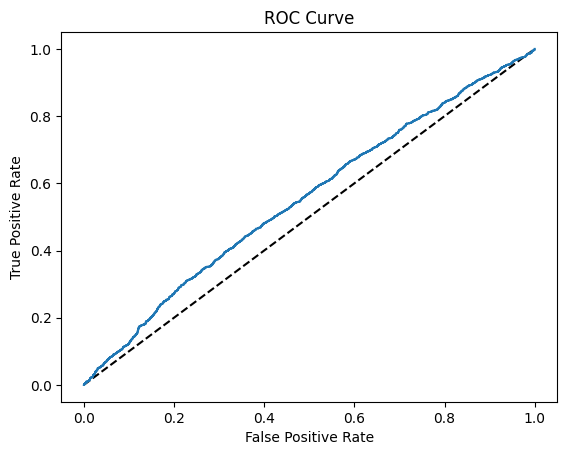

ROC AUC score: 0.5524662840793658
Length of train: 9574 Length of test: 4786
Accuracy score: 0.5194316757208525
Classification report:
              precision    recall  f1-score   support

         0.0       0.52      0.46      0.49      2383
         1.0       0.52      0.58      0.55      2403

    accuracy                           0.52      4786
   macro avg       0.52      0.52      0.52      4786
weighted avg       0.52      0.52      0.52      4786

Confusion matrix:
[[1089 1294]
 [1006 1397]]


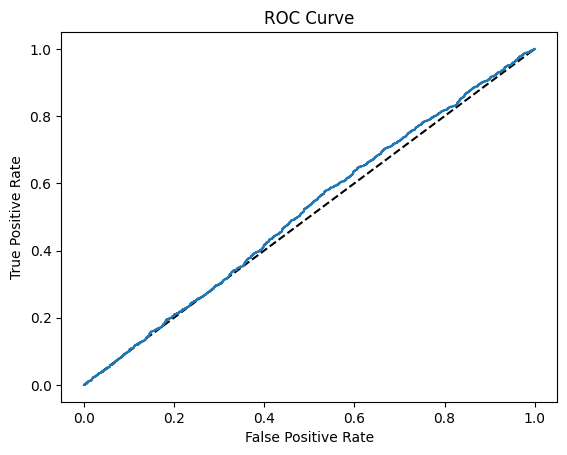

ROC AUC score: 0.5150445772690417
Length of train: 10000 Length of test: 4786
Accuracy score: 0.5167154199749269
Classification report:
              precision    recall  f1-score   support

         0.0       0.52      0.37      0.43      2370
         1.0       0.52      0.66      0.58      2416

    accuracy                           0.52      4786
   macro avg       0.52      0.52      0.51      4786
weighted avg       0.52      0.52      0.51      4786

Confusion matrix:
[[ 878 1492]
 [ 821 1595]]


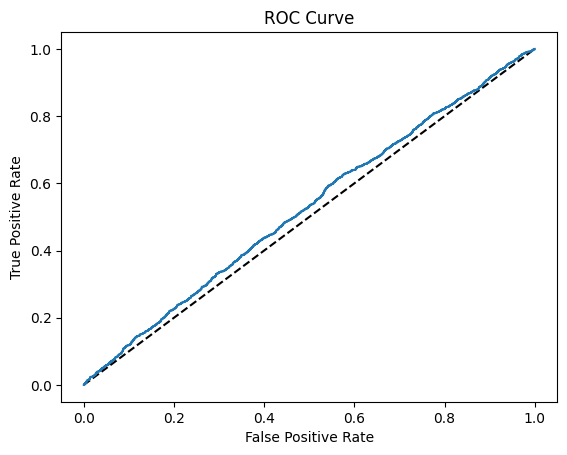

ROC AUC score: 0.5251227750300389
Length of train: 10000 Length of test: 4786
Accuracy score: 0.5114918512327622
Classification report:
              precision    recall  f1-score   support

         0.0       0.52      0.39      0.44      2419
         1.0       0.50      0.64      0.56      2367

    accuracy                           0.51      4786
   macro avg       0.51      0.51      0.50      4786
weighted avg       0.51      0.51      0.50      4786

Confusion matrix:
[[ 934 1485]
 [ 853 1514]]


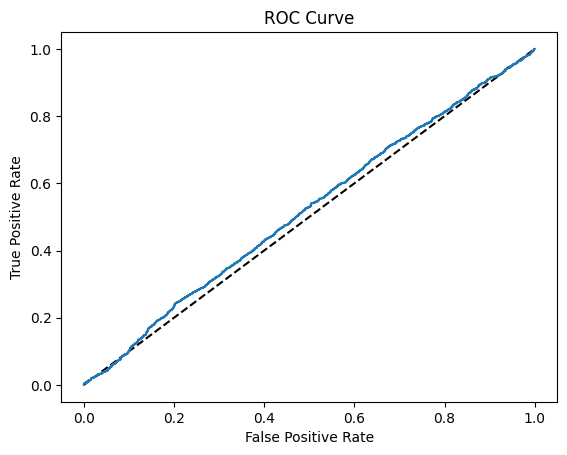

ROC AUC score: 0.519262988595601
Length of train: 10000 Length of test: 4786
Accuracy score: 0.5344755536982867
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.54      0.54      2460
         1.0       0.52      0.53      0.52      2326

    accuracy                           0.53      4786
   macro avg       0.53      0.53      0.53      4786
weighted avg       0.53      0.53      0.53      4786

Confusion matrix:
[[1331 1129]
 [1099 1227]]


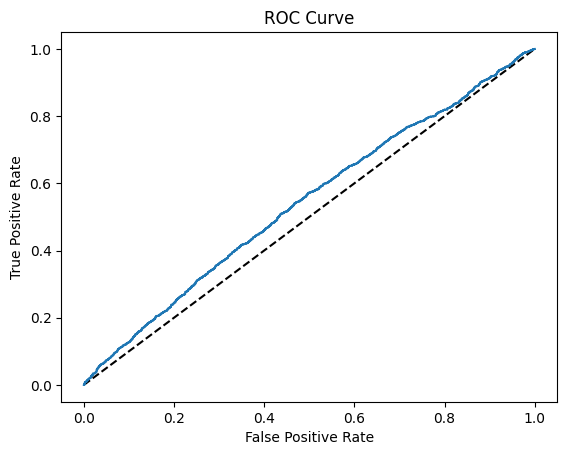

ROC AUC score: 0.5418108480310942


In [9]:
# Import time series train test split function
from sklearn.model_selection import TimeSeriesSplit
# Split the data into test and train
tscv = TimeSeriesSplit(n_splits=5, max_train_size=10000)
# Loop through the splits
for train_index, test_index in tscv.split(X):
    # Set up train and test variables
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    # Print the length of the train and test variables
    print("Length of train:", len(train_index), "Length of test:", len(test_index))
    # Instantiate the classifier
    clf = RandomForestClassifier(n_estimators=100, max_depth=8,min_samples_leaf=100, random_state=2)
    # Fit the classifier
    clf.fit(X_train, y_train)
    # Create predictions
    y_pred = clf.predict(X_test)
    # Import accuracy score
    print("Accuracy score:", accuracy_score(y_test, y_pred))
    # Import classification report
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    # Print confusion matrix
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    # Create predictions for the test set
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    # Calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    # Print roc auc score
    print("ROC AUC score:", roc_auc_score(y_test, y_pred_proba))


In [10]:
df['y_pred'] = clf.predict(X)
df['y_pred_proba'] = clf.predict_proba(X)[:,1]
# replace 0 with -1 in y_pred
df['y_pred'] = np.where(df['y_pred']==0, -1, df['y_pred'])
df.head()

,ticker1,closePEP,ret1PEP,PEP_ret5,PEP_ret10,PEP_ret20,zPEP5,zPEP10,zPEP20,ticker2,...,fret1_z20,Z5EQ,Z10EQ,Z20EQ,ComboRet,ComboEQ,spread,spread_signal,y_pred,y_pred_proba
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-04 09:00:00,BTC,7347.07,0.0010,0.0029,0.0019,0.0015,0.1896,0.0815,0.0523,ETH,...,0.0,100.0,100.0,100.0,0.0,100.0,-0.0031,0.0,1.0,0.508193
2020-01-04 10:00:00,BTC,7300.00,-0.0064,-0.0041,-0.0003,0.0073,-0.2704,-0.0113,0.2525,ETH,...,0.0,100.0,100.0,100.0,0.0,100.0,-0.0019,1.0,-1.0,0.465913
2020-01-04 11:00:00,BTC,7323.04,0.0032,-0.0032,0.0025,0.0016,-0.2068,0.1067,0.0569,ETH,...,0.0,100.0,100.0,100.0,0.0,100.0,0.0010,1.0,-1.0,0.489682
2020-01-04 12:00:00,BTC,7300.04,-0.0031,-0.0057,-0.0028,-0.0122,-0.3724,-0.1196,-0.4214,ETH,...,0.0,100.0,100.0,100.0,0.0,100.0,0.0040,0.0,-1.0,0.465421
2020-01-04 13:00:00,BTC,7289.15,-0.0015,-0.0069,-0.0054,-0.0085,-0.4493,-0.2310,-0.2936,ETH,...,0.0,100.0,100.0,100.0,0.0,100.0,-0.0037,1.0,1.0,0.513964


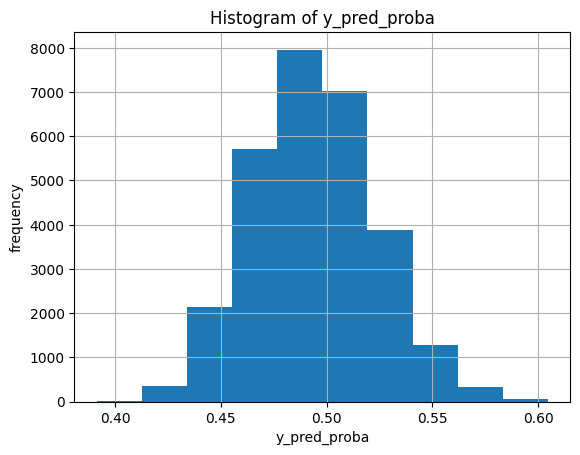

In [11]:
# plot y_pred proba distribution via histogram
df['y_pred_proba'].hist()
plt.xlabel('y_pred_proba')
plt.ylabel('frequency')
plt.title('Histogram of y_pred_proba')
plt.show()


In [12]:
df = df.tail(5743)

In [13]:
# calcuate future returns of the spread based on predicted signal
df['strat_ret'] = df['y_pred'].shift(1) * df['spread']
df['strat_ret'] = df['strat_ret'].fillna(0)
df['cum_ret'] = df['strat_ret'].cumsum()
df.head()


,ticker1,closePEP,ret1PEP,PEP_ret5,PEP_ret10,PEP_ret20,zPEP5,zPEP10,zPEP20,ticker2,...,Z10EQ,Z20EQ,ComboRet,ComboEQ,spread,spread_signal,y_pred,y_pred_proba,strat_ret,cum_ret
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-18 16:00:00,BTC,23340.36,-0.0048,-0.0082,-0.0010,-0.0028,-1.0166,-0.0957,-0.2519,ETH,...,574.154504,368.908839,0.000738,457.944635,-0.0028,1.0,-1.0,0.497046,0.0000,0.0000
2022-08-18 17:00:00,BTC,23264.34,-0.0033,-0.0125,-0.0065,-0.0027,-1.5467,-0.6074,-0.2421,ETH,...,573.852990,368.715109,-0.000525,457.704148,0.0019,0.0,-1.0,0.472275,-0.0019,-0.0019
2022-08-18 18:00:00,BTC,23313.88,0.0021,-0.0059,-0.0067,-0.0014,-0.7192,-0.6216,-0.1223,ETH,...,573.694603,368.613341,-0.000276,457.577819,-0.0011,0.0,-1.0,0.476921,0.0011,-0.0008
2022-08-18 19:00:00,BTC,23345.17,0.0013,-0.0032,-0.0080,-0.0002,-0.3882,-0.7465,-0.0148,ETH,...,573.212445,368.303543,-0.000840,457.193251,-0.0009,0.0,-1.0,0.477510,0.0009,0.0001
2022-08-18 20:00:00,BTC,23414.58,0.0030,-0.0017,-0.0031,-0.0020,-0.2040,-0.2924,-0.1766,ETH,...,573.138940,368.256314,-0.000128,457.134623,-0.0008,1.0,1.0,0.507385,0.0008,0.0009


In [14]:
df.tail()

,ticker1,closePEP,ret1PEP,PEP_ret5,PEP_ret10,PEP_ret20,zPEP5,zPEP10,zPEP20,ticker2,...,Z10EQ,Z20EQ,ComboRet,ComboEQ,spread,spread_signal,y_pred,y_pred_proba,strat_ret,cum_ret
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-14 18:00:00,BTC,30299.15,0.0006,-0.0152,-0.0150,-0.0012,-2.1786,-1.6601,-0.1220,ETH,...,634.157923,369.995465,0.000529,501.943373,-0.0018,0.0,-1.0,0.481326,0.0018,1.1069
2023-04-14 19:00:00,BTC,30336.07,0.0012,-0.0097,-0.0160,-0.0025,-1.3465,-1.7265,-0.2604,ETH,...,633.491152,369.606441,-0.001051,501.415615,-0.0038,0.0,-1.0,0.472952,0.0038,1.1107
2023-04-14 20:00:00,BTC,30466.45,0.0043,0.0066,-0.0110,0.0017,0.9002,-1.1626,0.1740,ETH,...,633.159301,369.412825,-0.000524,501.152952,-0.0029,1.0,1.0,0.520899,0.0029,1.1136
2023-04-14 21:00:00,BTC,30475.61,0.0003,0.0106,-0.0116,0.0020,1.4296,-1.2290,0.2072,ETH,...,633.310819,369.501227,0.000239,501.272880,0.0014,0.0,-1.0,0.494115,0.0014,1.1150
2023-04-14 22:00:00,BTC,30472.66,-0.0001,0.0064,-0.0039,0.0013,0.8505,-0.4041,0.1394,ETH,...,632.704193,369.147295,-0.000958,500.792729,-0.0007,0.0,1.0,0.513967,0.0007,1.1157


In [15]:
# calculate the sharpe ratio
sharpe_A = np.sqrt(365*24)*df['strat_ret'].mean()/df['strat_ret'].std()
sharpe_A

4.940441628846388

In [16]:
# calculate equity curve which df[f'equity_curve{n}'] = 100*(1+df[f'returns{n}']).cumprod()
df['equity_curve'] = 100*(1+df['strat_ret']).cumprod()


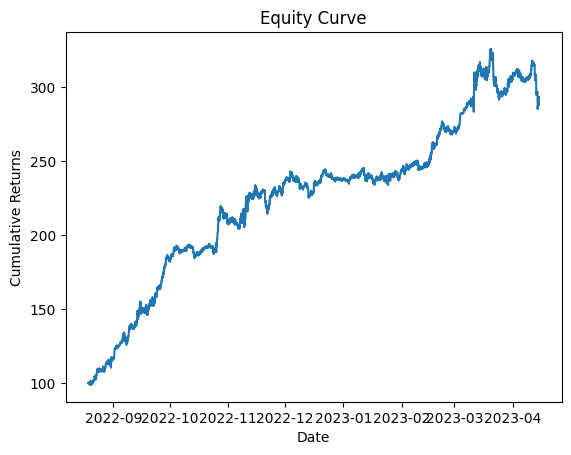

In [17]:
# Plot the equity curve
import matplotlib.pyplot as plt
plt.plot(df['equity_curve'])
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

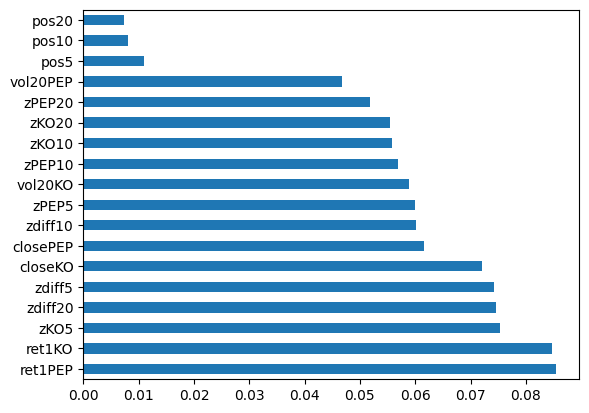

In [18]:
# plot random forest feature importance
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

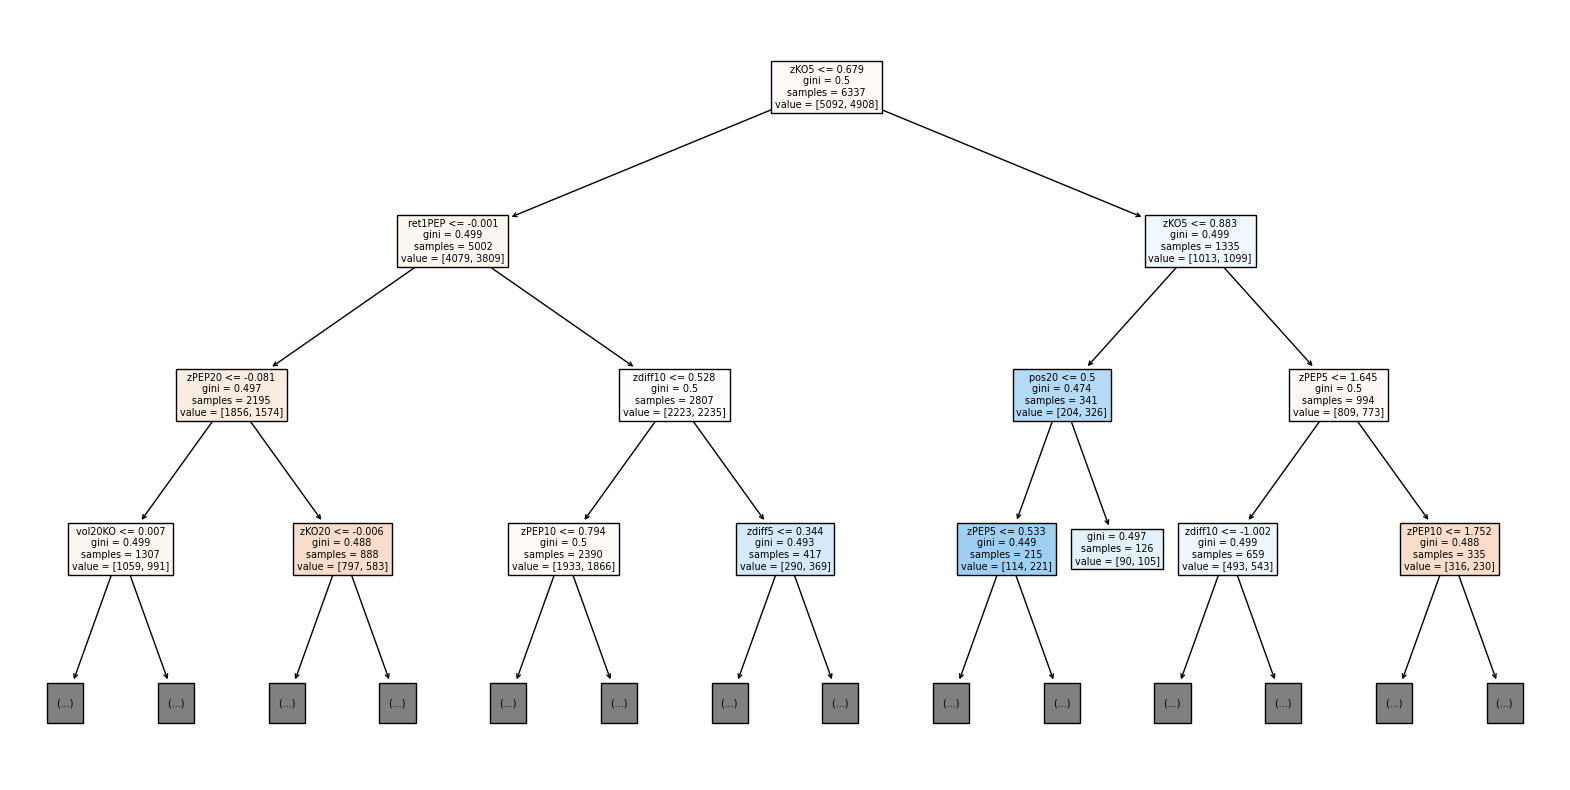

In [19]:
# Plot random forest decision tree until depth of 3
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)
plt.show()


Length of train: 4788 Length of test: 4786
Accuracy score: 0.5229837024655244
Classification report:
              precision    recall  f1-score   support

         0.0       0.52      0.64      0.57      2393
         1.0       0.53      0.40      0.46      2393

    accuracy                           0.52      4786
   macro avg       0.52      0.52      0.52      4786
weighted avg       0.52      0.52      0.52      4786

Confusion matrix:
[[1534  859]
 [1424  969]]


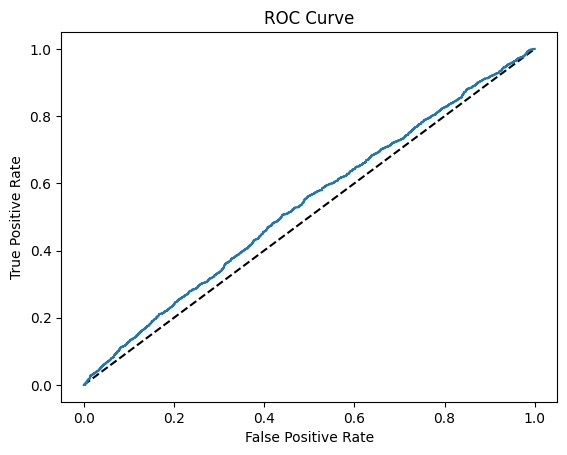

ROC AUC score: 0.5346570798063512
      y_pred  spread  strat_ret  cum_ret  equity_curve
4781       0     NaN        0.0      0.0         100.0
4782       0     NaN        0.0      0.0         100.0
4783       0     NaN        0.0      0.0         100.0
4784       0     NaN        0.0      0.0         100.0
4785       1     NaN        0.0      0.0         100.0
nan
Length of train: 9574 Length of test: 4786


C:\Users\Nakul\AppData\Local\Temp\ipykernel_70456\2980602674.py:52: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_A = np.sqrt(365*24)*df_m['strat_ret'].mean()/df_m['strat_ret'].std()


Accuracy score: 0.5190137902214793
Classification report:
              precision    recall  f1-score   support

         0.0       0.53      0.35      0.42      2383
         1.0       0.52      0.68      0.59      2403

    accuracy                           0.52      4786
   macro avg       0.52      0.52      0.51      4786
weighted avg       0.52      0.52      0.51      4786

Confusion matrix:
[[ 845 1538]
 [ 764 1639]]


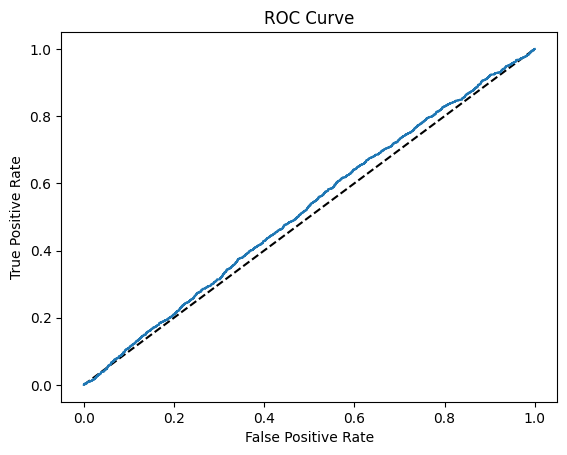

ROC AUC score: 0.5212089762604409
      y_pred  spread  strat_ret  cum_ret  equity_curve
4781       1     NaN        0.0      0.0         100.0
4782       0     NaN        0.0      0.0         100.0
4783       0     NaN        0.0      0.0         100.0
4784       0     NaN        0.0      0.0         100.0
4785       0     NaN        0.0      0.0         100.0
nan
Length of train: 14360 Length of test: 4786


C:\Users\Nakul\AppData\Local\Temp\ipykernel_70456\2980602674.py:52: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_A = np.sqrt(365*24)*df_m['strat_ret'].mean()/df_m['strat_ret'].std()


Accuracy score: 0.5117007939824488
Classification report:
              precision    recall  f1-score   support

         0.0       0.51      0.47      0.49      2370
         1.0       0.52      0.55      0.53      2416

    accuracy                           0.51      4786
   macro avg       0.51      0.51      0.51      4786
weighted avg       0.51      0.51      0.51      4786

Confusion matrix:
[[1123 1247]
 [1090 1326]]


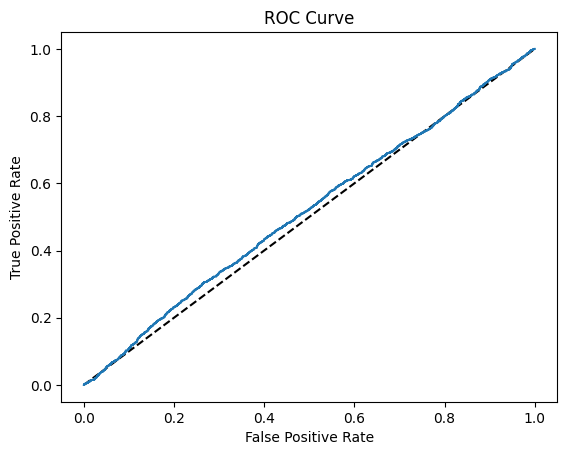

ROC AUC score: 0.5161643893033783
      y_pred  spread  strat_ret  cum_ret  equity_curve
4781       0     NaN        0.0      0.0         100.0
4782       1     NaN        0.0      0.0         100.0
4783       1     NaN        0.0      0.0         100.0
4784       1     NaN        0.0      0.0         100.0
4785       1     NaN        0.0      0.0         100.0
nan
Length of train: 19146 Length of test: 4786


C:\Users\Nakul\AppData\Local\Temp\ipykernel_70456\2980602674.py:52: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_A = np.sqrt(365*24)*df_m['strat_ret'].mean()/df_m['strat_ret'].std()


Accuracy score: 0.5002089427496866
Classification report:
              precision    recall  f1-score   support

         0.0       0.51      0.38      0.43      2419
         1.0       0.50      0.62      0.55      2367

    accuracy                           0.50      4786
   macro avg       0.50      0.50      0.49      4786
weighted avg       0.50      0.50      0.49      4786

Confusion matrix:
[[ 918 1501]
 [ 891 1476]]


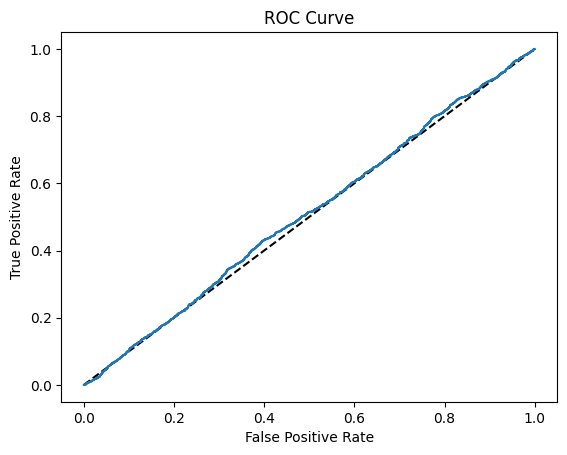

ROC AUC score: 0.5083872518173529
      y_pred  spread  strat_ret  cum_ret  equity_curve
4781       1     NaN        0.0      0.0         100.0
4782       1     NaN        0.0      0.0         100.0
4783       1     NaN        0.0      0.0         100.0
4784       1     NaN        0.0      0.0         100.0
4785       1     NaN        0.0      0.0         100.0
nan
Length of train: 23932 Length of test: 4786


C:\Users\Nakul\AppData\Local\Temp\ipykernel_70456\2980602674.py:52: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_A = np.sqrt(365*24)*df_m['strat_ret'].mean()/df_m['strat_ret'].std()


Accuracy score: 0.5223568742164647
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.47      0.50      2460
         1.0       0.51      0.58      0.54      2326

    accuracy                           0.52      4786
   macro avg       0.52      0.52      0.52      4786
weighted avg       0.52      0.52      0.52      4786

Confusion matrix:
[[1144 1316]
 [ 970 1356]]


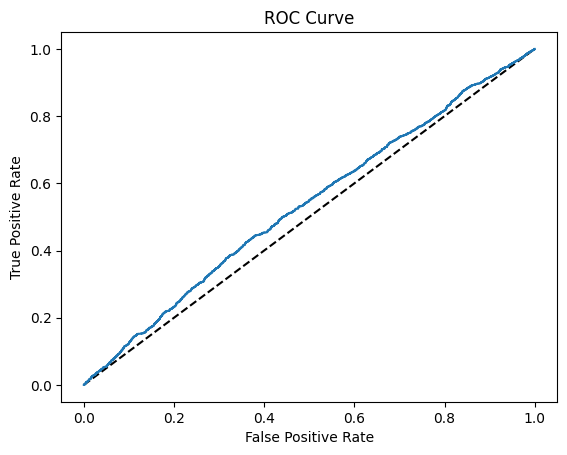

ROC AUC score: 0.5336198610266412
      y_pred  spread  strat_ret  cum_ret  equity_curve
4781       1     NaN        0.0      0.0         100.0
4782       1     NaN        0.0      0.0         100.0
4783       0     NaN        0.0      0.0         100.0
4784       1     NaN        0.0      0.0         100.0
4785       0     NaN        0.0      0.0         100.0
nan


C:\Users\Nakul\AppData\Local\Temp\ipykernel_70456\2980602674.py:52: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_A = np.sqrt(365*24)*df_m['strat_ret'].mean()/df_m['strat_ret'].std()


In [31]:
# try an xgboost model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
# Split the data into test and train
tscv = TimeSeriesSplit(n_splits=5)
# Loop through the splits
for train_index, test_index in tscv.split(X):
    # Set up train and test variables
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    # Print the length of the train and test variables
    print("Length of train:", len(train_index), "Length of test:", len(test_index))
    # Instantiate the classifier
    clf = XGBClassifier(n_estimators=200, max_depth=7, learning_rate=0.01, subsample=0.7, colsample_bytree=0.7, random_state=0)
    # Fit the classifier
    clf.fit(X_train, y_train)
    # Create predictions
    y_pred = clf.predict(X_test)
    # Import accuracy score
    print("Accuracy score:", accuracy_score(y_test, y_pred))
    # Import classification report
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    # Print confusion matrix
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    # Import roc curve
    from sklearn.metrics import roc_curve
    # Create predictions for the test set
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    # Calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    # Plot ROC curve
    import matplotlib.pyplot as plt
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    # Print roc auc score
    print("ROC AUC score:", roc_auc_score(y_test, y_pred_proba))
    df_m = pd.DataFrame()
    df_m['y_pred'] = y_pred
    df_m['spread'] = df['spread'].iloc[test_index]
    df_m['strat_ret'] = df_m['y_pred'].shift(1) * df_m['spread']
    df_m['strat_ret'] = df_m['strat_ret'].fillna(0)
    df_m['cum_ret'] = df_m['strat_ret'].cumsum()
    df_m['equity_curve'] = 100*(1+df_m['strat_ret']).cumprod()
    print(df_m.tail())
    sharpe_A = np.sqrt(365*24)*df_m['strat_ret'].mean()/df_m['strat_ret'].std()
    print(sharpe_A)


Length of train: 5746 Length of test: 5743
Accuracy score: 0.5067038133379766
Classification report:
              precision    recall  f1-score   support

         0.0       0.50      0.60      0.55      2864
         1.0       0.51      0.41      0.45      2879

    accuracy                           0.51      5743
   macro avg       0.51      0.51      0.50      5743
weighted avg       0.51      0.51      0.50      5743

Confusion matrix:
[[1729 1135]
 [1698 1181]]


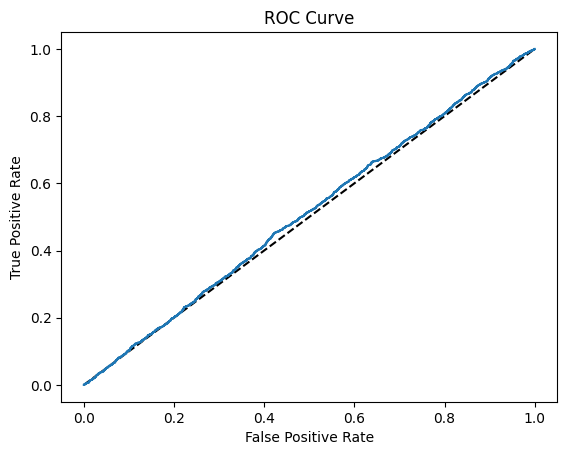

ROC AUC score: 0.5102551029318452
Length of train: 11489 Length of test: 5743
Accuracy score: 0.5067038133379766
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.06      0.10      2855
         1.0       0.51      0.95      0.66      2888

    accuracy                           0.51      5743
   macro avg       0.52      0.50      0.38      5743
weighted avg       0.52      0.51      0.38      5743

Confusion matrix:
[[ 162 2693]
 [ 140 2748]]


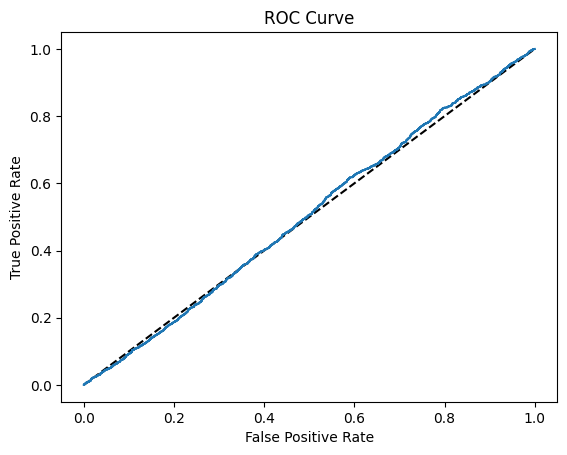

ROC AUC score: 0.5043485695989444
Length of train: 17232 Length of test: 5743
Accuracy score: 0.5110569388821173
Classification report:
              precision    recall  f1-score   support

         0.0       0.51      0.49      0.50      2881
         1.0       0.51      0.54      0.52      2862

    accuracy                           0.51      5743
   macro avg       0.51      0.51      0.51      5743
weighted avg       0.51      0.51      0.51      5743

Confusion matrix:
[[1402 1479]
 [1329 1533]]


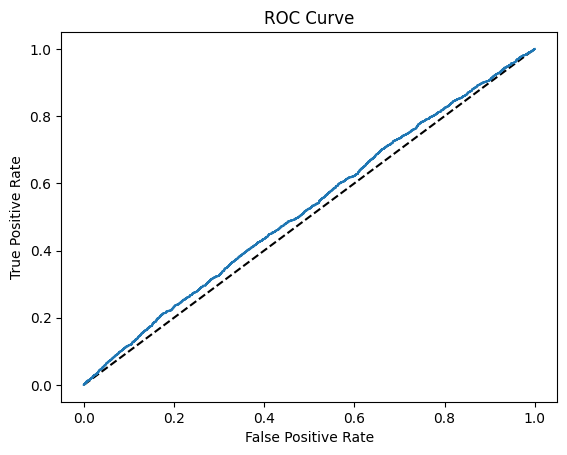

ROC AUC score: 0.5246500421688545
Length of train: 22975 Length of test: 5743
Accuracy score: 0.5307330663416333
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.57      0.55      2931
         1.0       0.52      0.49      0.50      2812

    accuracy                           0.53      5743
   macro avg       0.53      0.53      0.53      5743
weighted avg       0.53      0.53      0.53      5743

Confusion matrix:
[[1675 1256]
 [1439 1373]]


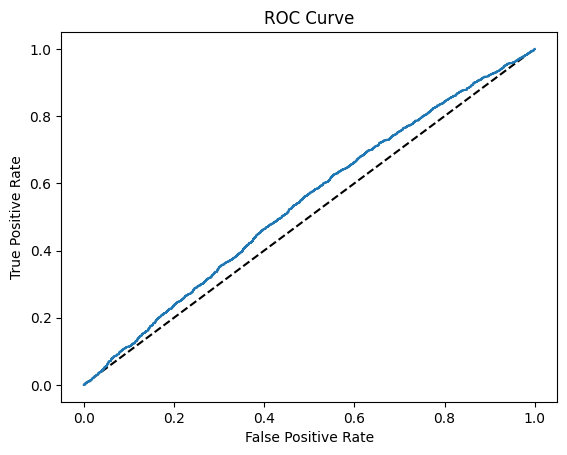

ROC AUC score: 0.540825302488288


In [55]:
# Try logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
# Split the data into test and train
tscv = TimeSeriesSplit(n_splits=4)
# Loop through the splits
for train_index, test_index in tscv.split(X):
    # Set up train and test variables
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    # Print the length of the train and test variables
    print("Length of train:", len(train_index), "Length of test:", len(test_index))
    # Instantiate the classifier
    clf = LogisticRegression(C=1e9, solver='liblinear', max_iter=1000)
    # Fit the classifier
    clf.fit(X_train, y_train)
    # Create predictions
    y_pred = clf.predict(X_test)
    # Import accuracy score
    print("Accuracy score:", accuracy_score(y_test, y_pred))
    # Import classification report
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    # Print confusion matrix
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    # Import roc curve
    from sklearn.metrics import roc_curve
    # Create predictions for the test set
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    # Calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    # Plot ROC curve
    import matplotlib.pyplot as plt
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    # Print roc auc score
    print("ROC AUC score:", roc_auc_score(y_test, y_pred_proba))
